# Exploratory Data Analysis 🥏
In this notebook, I use the cleaned version of data to perform an exploratory data analysis (EDA) on data scraped from the AUDL website. In this EDA, I look to explore two problems: </br>
1. Does playing on your home field give an advantage, and if so, how much?
- It's a well-known phenomenon in any sport that playing on your home field tends to offer an advantage. This could be because you practice there, or maybe you know the fans and they give a boost. Fans of ultimae in particular are a big part of the game and can be a huge deciding factor in the energy levels of the teams on the field. For this problem, I'll assess game scores for all AUDL season and try to assess what kind of advantages playing at home can have.
2. Can players be categorized into their on-field roles based on stats?
- The AUDL website breaks players into four categories: Handler, Cutter, Defender, and Hybrid. Of the nearly 2,700 players on the website, < 500 have this designation on their webpage. I will be analyzing the stats of these different groups and creating a classifier based on their stats that could be used in the future to classify any players without a classification.
</br>


In [2]:
# IMPORTS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

## Problem 1: Home Court Advantage 🏡

In [3]:
# Import and sample data
DATA_PATH = "DATA\\postproc\\all_games_stats.csv"
df: pd.DataFrame = pd.read_csv(DATA_PATH)
df.head()

,team,turnovers,blocks,home_team,home_score,away_team,away_score,completions,total_passes,o_line_scores,...,o_line_posessions,d_line_scores,d_line_points,d_line_posessions,rz_scores,rz_posessions,huck_completions,huck_attempts,season,is_home_team
0,Spiders,23,10,TOR,18,SJ,28,234,257,17,...,28,11,30,23,NaN,NaN,NaN,NaN,2014,False
1,Rush,22,19,TOR,31,NY,16,270,292,16,...,25,15,33,30,NaN,NaN,NaN,NaN,2014,True
2,Empire,37,12,TOR,31,NY,16,213,250,15,...,47,1,18,8,NaN,NaN,NaN,NaN,2014,False
3,Spiders,19,10,SJ,23,MAD,20,272,291,16,...,28,7,25,15,NaN,NaN,NaN,NaN,2014,True
4,Radicals,21,16,SJ,23,MAD,20,265,286,15,...,33,5,22,12,NaN,NaN,NaN,NaN,2014,False


In [4]:
# Null Data and DTypes Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   team               2238 non-null   object 
 1   turnovers          2238 non-null   int64  
 2   blocks             2238 non-null   int64  
 3   home_team          2238 non-null   object 
 4   home_score         2238 non-null   int64  
 5   away_team          2238 non-null   object 
 6   away_score         2238 non-null   int64  
 7   completions        2238 non-null   int64  
 8   total_passes       2238 non-null   int64  
 9   o_line_scores      2238 non-null   int64  
 10  o_line_points      2238 non-null   int64  
 11  o_line_posessions  2238 non-null   int64  
 12  d_line_scores      2238 non-null   int64  
 13  d_line_points      2238 non-null   int64  
 14  d_line_posessions  2238 non-null   int64  
 15  rz_scores          268 non-null    float64
 16  rz_posessions      268 n

In [5]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

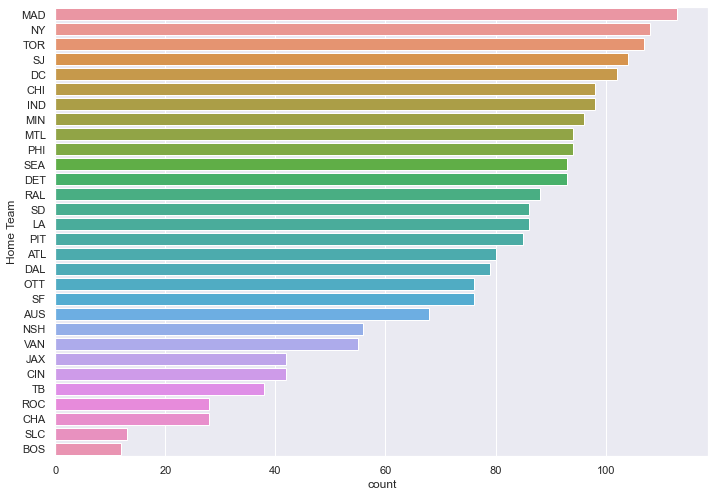

In [6]:
# Count of Home Team 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data=df, 
              y='home_team',
              order = df['home_team'].value_counts().index)
plt.ylabel('Home Team')
plt.show()


<AxesSubplot:>

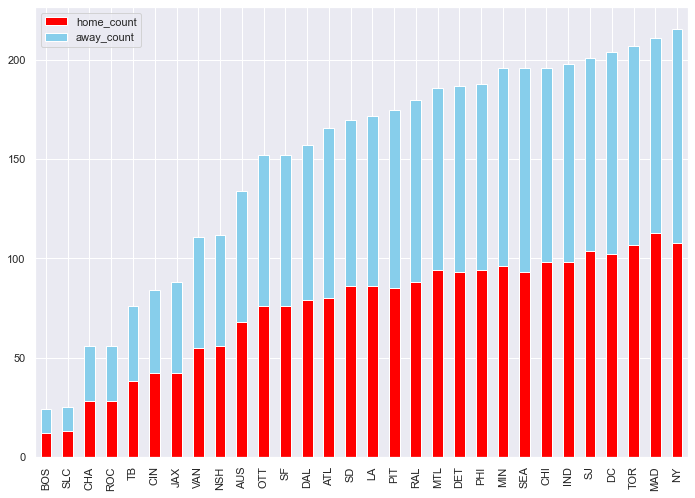

In [7]:
# Create a df for stacked total games
indx = df['home_team'].unique()
home_count = [df[df['home_team'] == i].shape[0] for i in indx]
away_count = [df[df['away_team'] == i].shape[0] for i in indx]
total_games_df = pd.DataFrame(index=indx, data={'home_count': home_count,
                                                'away_count': away_count})

total_games_df['total_games'] = total_games_df['home_count'] + total_games_df['away_count']
total_games_df.sort_values(by='total_games', inplace=True)
total_games_df.drop(labels='total_games', axis=1, inplace=True)

total_games_df.plot(kind='bar', 
                    stacked=True, 
                    color=['red', 'skyblue']
                    )

<AxesSubplot:xlabel='home_score', ylabel='home_team'>

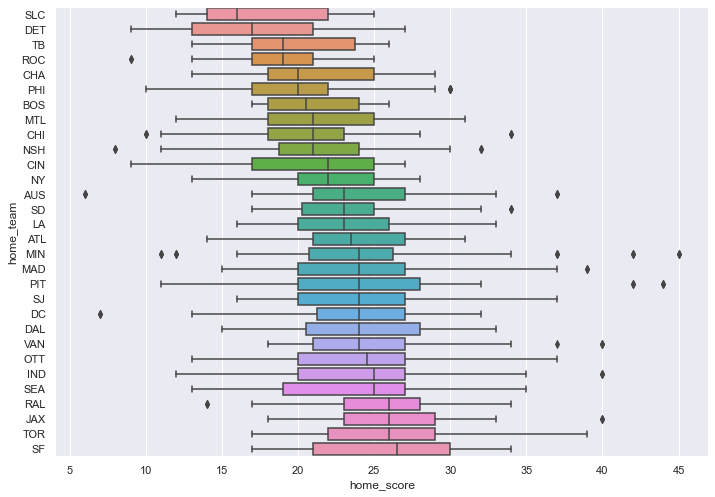

In [15]:
# Home and Away Scores
sort = df.groupby(by='home_team').median().sort_values(by='home_score').index
sns.boxplot(data=df, x='home_score', y='home_team', order=sort)

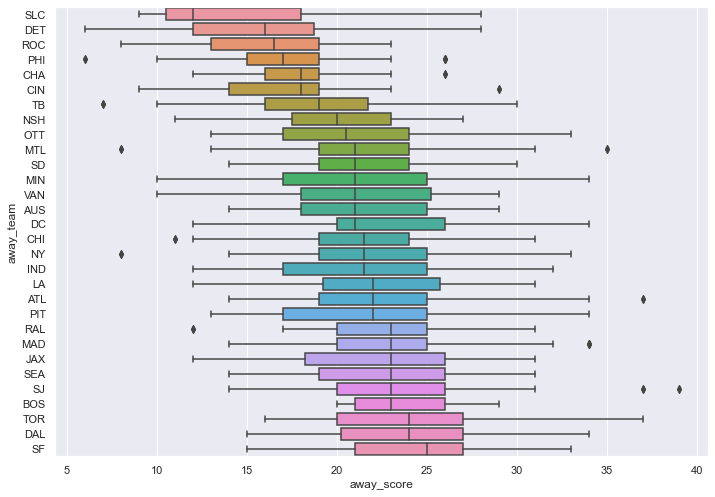

In [17]:
sort = df.groupby(by='away_team').median().sort_values(by='away_score').index
sns.boxplot(data=df, x='away_score', y='away_team', order=sort);

Text(0.5, 0, 'Score')

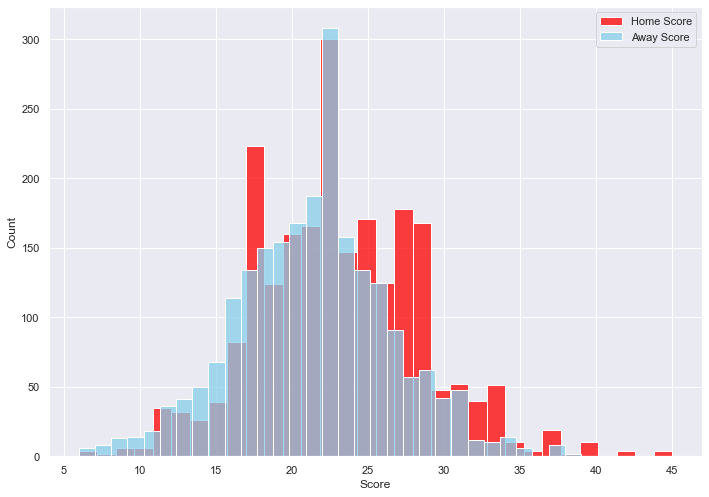

In [10]:
# Histograms of Scores
sns.histplot(data=df, x='home_score', color='red')
sns.histplot(data=df, x='away_score', color='skyblue')
plt.legend(['Home Score', 'Away Score'])
plt.xlabel('Score')

Text(0.5, 0, 'Scores')

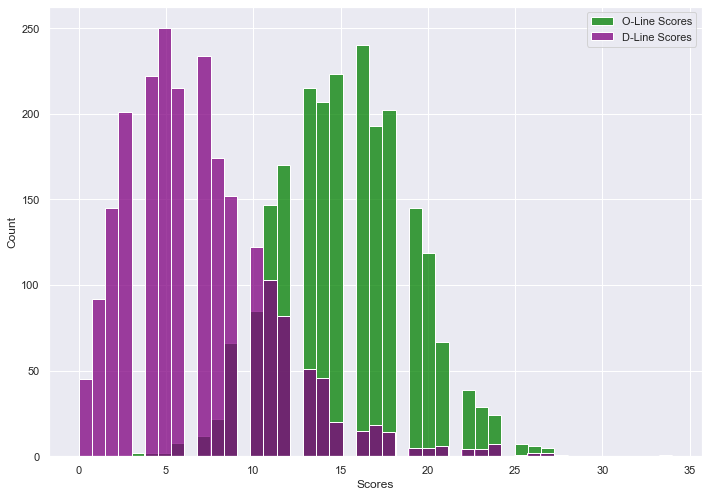

In [11]:
# Histograms of Scores
sns.histplot(data=df, x='o_line_scores', color='green')
sns.histplot(data=df, x='d_line_scores', color='purple')
plt.legend(['O-Line Scores', 'D-Line Scores']);
plt.xlabel('Scores')

Text(0.5, 0, 'Posessions')

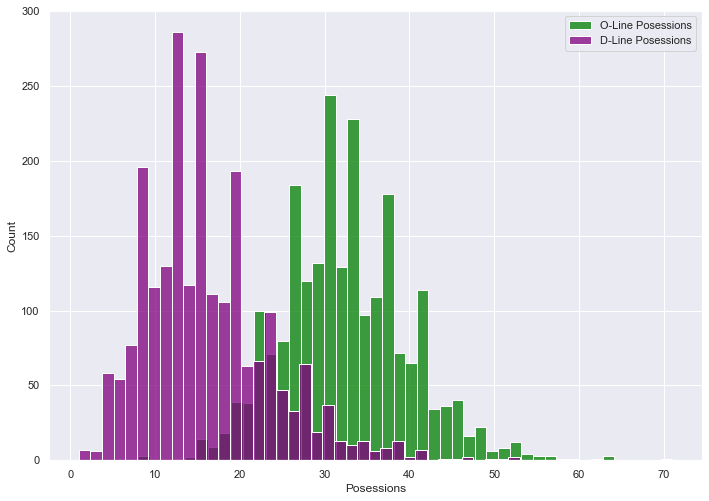

In [12]:
sns.histplot(data=df, x='o_line_posessions', color='green')
sns.histplot(data=df, x='d_line_posessions', color='purple')
plt.legend(['O-Line Posessions', 'D-Line Posessions'])
plt.xlabel('Posessions')

### P1 Univariate Summary
- Dataset is heavily biased towards teams that have been in the league longer as well as towards offensive scores. Teams like NY, San Jose, DC, Toronto, and Madison have been in the league since the 2nd season. These teams have had many more chances to play games. Additionally, of these five teams, four have won at least one championship meaning they've participated in championship weekends which occur outside of the regular season
- SLC is by far the worst performing team, taking the lowest median score in both home and away games. The lowest scoring home teams in most cases are also the lowest scoring away teams.
- There are, however, some rare teams that perform nominally better in certain situations:
    - Boston is one such team, sporting a median score of 21 goals when playing at home. They are tied for 6th place as the lowest scoring team for home games. Alternatively, their median score while away from home is 23 goals, tying them for 3rd place in terms of goals scored away from home.
    - Other teams such as Chicago and Indiana also apear to perform better while away. Certain weather-related factors could affect this. If your home stadium is cold for even part of the season, it could affect how well you play.
- The top two consistent scorers are the San Francisco Flamethrowers and the Toronto Rush

<AxesSubplot:>

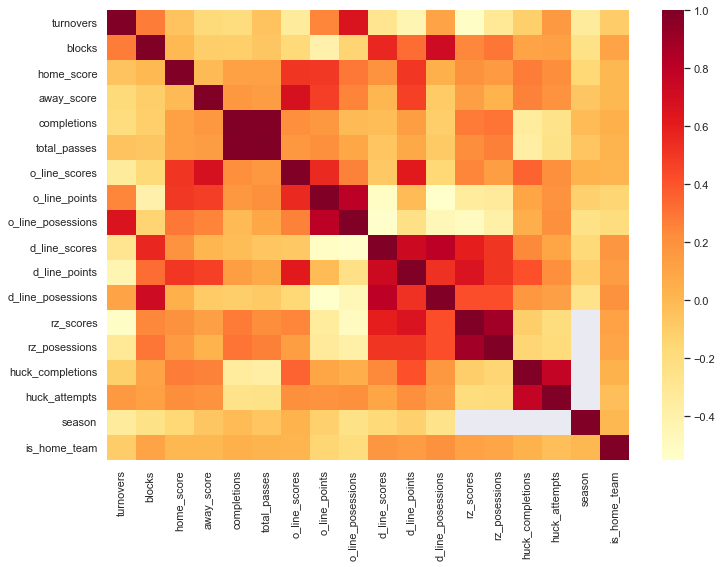

In [18]:
# Correlation Matrix
corr_df = df.corr()
sns.heatmap(corr_df, cmap='YlOrRd')

<AxesSubplot:xlabel='season', ylabel='score'>

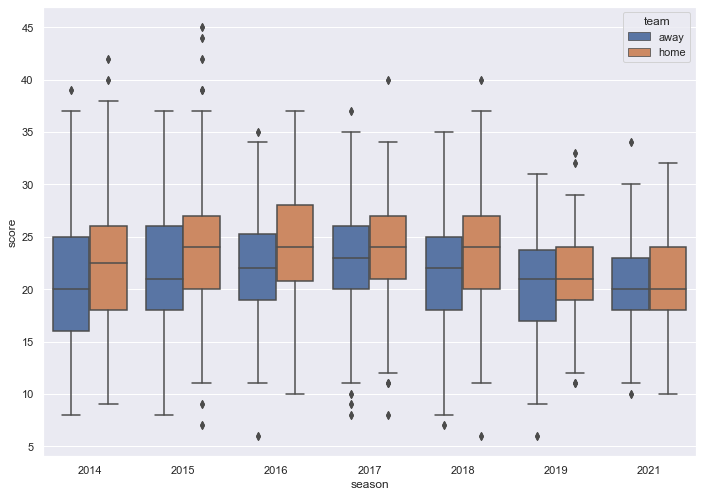

In [53]:
# Get Season, home score, and away score into separate lists to compare using a boxplot
seasons = [i for i in df['season']]
away_scores = [i for i in df['away_score']]
home_scores = [i for i in df['home_score']]

temp_df = pd.DataFrame({
    'season': seasons*2,
    'score': away_scores + home_scores,
    'team': ['away']*len(seasons) + ['home']*len(seasons)
})

sns.boxplot(data=temp_df, x='season', y='score', hue='team')

Text(0.5, 1.0, 'Home v. Away Score Average by Season')

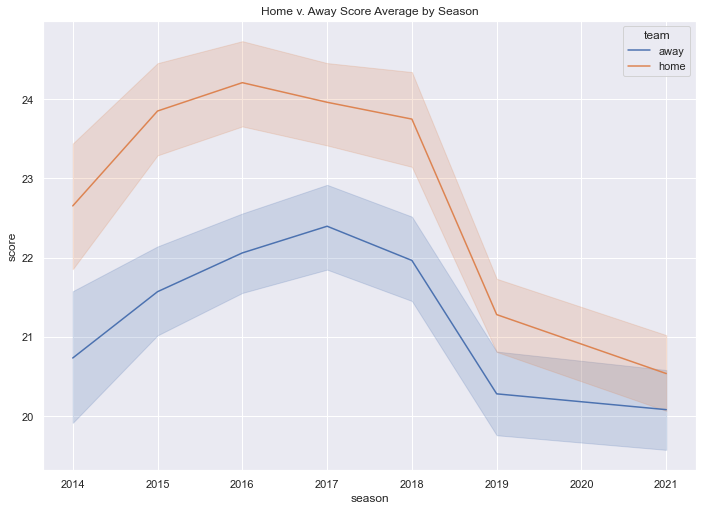

In [72]:
sns.lineplot(data=temp_df, x='season', y='score', hue='team')
plt.title("Home v. Away Score Average by Season")

In [83]:
# Calculation for Margin of Victory and Apply to each game
def calculate_margin_of_victory(x: int, y: int) -> float:
    return((max(x,y) - min(x,y)) / sum([x,y]))

df['victory_margin'] = pd.NA
for i in df.index:
    a = df.at[i, 'home_score']
    b = df.at[i, 'away_score']
    df.at[i, 'victory_margin'] = calculate_margin_of_victory(a, b)

Text(0.5, 1.0, 'Margin of Victory by Season')

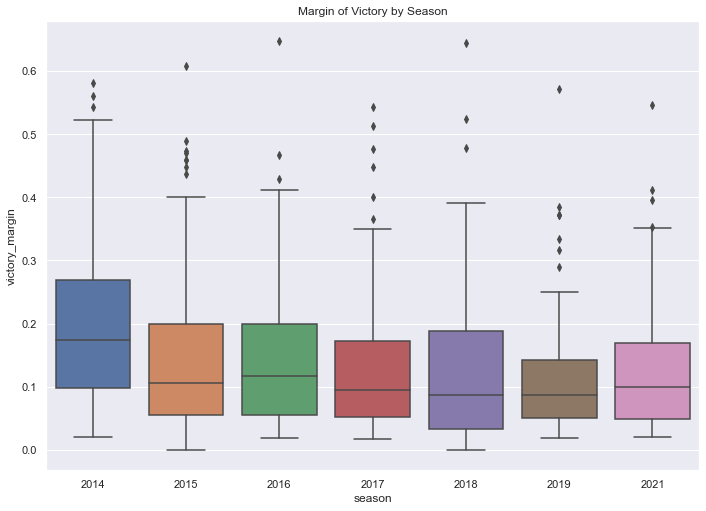

In [86]:
# Margin of Victory
sns.boxplot(data=df[df['is_home_team'] == True], x='season', y='victory_margin')
plt.title("Margin of Victory by Season")

In [109]:
# Assign a column indicating the winning team
def winning_team(x):
    if x['home_score'] > x['away_score']:
        return 'home'
    return 'away'

df['winning_team'] = pd.NA

for ind in df.index:
    h_score = df.at[ind, 'home_score']
    a_score = df.at[ind, 'away_score']

    if h_score > a_score:
        df.at[ind, 'winning_team'] = 'home'
    
    if a_score > h_score:
        df.at[ind, 'winning_team'] = 'away'


<AxesSubplot:xlabel='season', ylabel='victory_margin'>

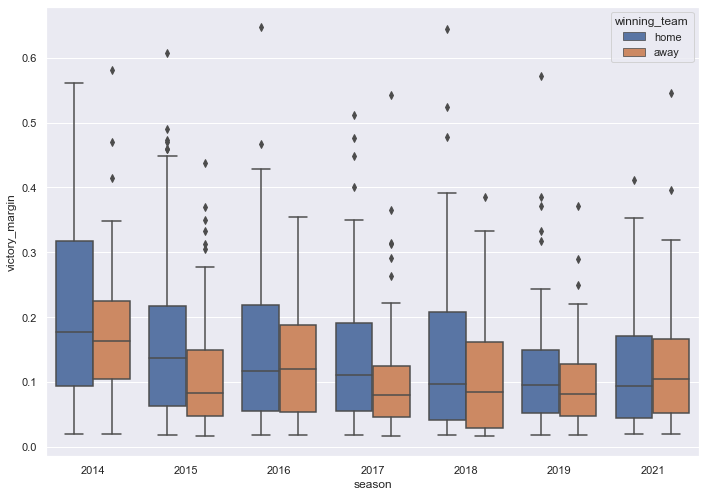

In [111]:
# Victory Margin by Away wins v. Home Wins
sns.boxplot(data=df[df['is_home_team']==True],
                    x='season', y='victory_margin', hue='winning_team')

### Multivariate Summary:
**Correlation Matrix**
- As expected there is significant correlation between several pairs of attributes. Notably total passes v. completions, away score v. o-line points, and blocks v. d-line posessions.
    - Completion percentage as a whole likely does not drop below 90% for any team, so total passes should correlate heavily with the number of completions.
    - Excluding halftime (sometimes) and the end of the game, every away score should be followed by an o-line point, so these two have a near one-to-one correlation.
    - Finally, the more chances you give great players, the more great plays they're going to make.
- Given this analysis is looking at effect of playing at home, it's important to note which which attributes show some correlation (either positively or negatively) with 'home_score' and 'away_score'.
    - 'home_score' most strongly correlates with 'o_line_scores', 'o_line_points', 'd_line_score', and 'd_line_points'
- There also seems to be some significant correlation with d-line scores, points, and posessions, and red zone numbers.
- Note: The gray areas seen related to season correlation with huck stats and red zone stats appears that way because the redzone numbers and huck stats have only been collected for one season, therefore no correlation could be determined.

**Box Plot**
- For all seasons except the last two, the median scores of the home and away teams have been largely different. As the league has grown and matured, however, that gap has closed. So much so that the median score for the last two seasons has been equal for home and away teams at 21 goals in 2019 and 20 goals in 2021.

**Line Plot**
- When looking at mean values, There is a better indication of the home-court advantage. The 2015 season was particularly noticeable for having a significant difference between home and away scores. There is also a notable drop in the home-away difference, as well as average score in the 2019 season. [this article](https://theaudl.com/league/news/2019-audl-closer-ever-competition) gives one plausible explanation as to why that may have happened:


>Perhaps the most tactical explanation for tighter games in 2019 stems from a subtle rule change introduced this year. Rule 5.2.3 permits the clock to start when a pull is released, unless “there are 60 seconds or less remaining in any quarter or overtime period at the time of the pull.” Though said change may not be noticeable to the casual viewer, its impact can compound over the course of a game.

**Margin of Victory**
- The victory margin is calculated as the final score delta over the total number of points scored by both teams. For a final score of 20 to 18, the victory margin is (20-18) / (20+18) = 2/38 = 5.26%. A higher margin of victory indicates a higher outscoring ability.
- There is some truth in what the above article is saying. From the above boxplot showing changes in margin of victory over the years, 2019 by far had some of the closest games (i.e. smallest margins of victory). It's difficult to make any conclusions as to whether or not games will continue to be close, but the 2022 season is scheduled to start soon and is bound to bring more information and stats to analyze.
- When looking at home wins v. away wins, the 2016 and 2021 seasons were the only two where, in the cases where the away team won, they tended to win by a larger margin of victory than when home teams won. For all seasons, the range of margins of victory seen by the home team were significantly larger than the ranges seen by away teams.

### Hypothesis Testing 🧪
In this section, I use a statistical test to compares scores from the home team to the away team. This is done both overall and by season. The test used will help determine, to what confidence, we can say that home teams score more points than away teams.

In [ ]:
# IMPORTS

---------------------------
# X. Scratch
---------------------------

In [ ]:
# Heatmap of Who has Played Whom
df_plot = df.groupby(['home_team', 'away_team']).size().reset_index().pivot(columns='home_team',
                                                                       index='away_team', 
                                                                       values=0)

sns.heatmap(df_plot)

---------------------------
# X. Resources
---------------------------
1. The AUDL Website: https://theaudl.com/
2. 'AUDL 2019: Closer than Ever' (https://theaudl.com/league/news/2019-audl-closer-ever-competition)